# The delay between stocks and bonds in rises

Data: SX5E Index (R2) - EuroSTOXX 50 versus GDBR10 Index (L1) - Bund 10 year yield index
Finding: Rates increased up to 6 quarters before every major drawdown.

This notebook compares the rise in yields and the subsequent equity drawdown.

Check: https://macrosummary.substack.com/p/insights-european-equities-in-a-risky?s=r

In [13]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [15]:
# Import data
data = pd.read_excel('SX5E-GDBR10-Q data.xlsx')

**Data loaded**

In [16]:
# Get first overview over the data
data

Date  SX5E Index  (R2)  GDBR10 Index  (L1)  SX5E Index - Volume
0   2022-04-06           3819.38               0.644         1.040000e+09
1   2022-03-31           3902.52               0.548         2.933000e+10
2   2021-12-31           4298.41              -0.177         2.277000e+10
3   2021-09-30           4048.08              -0.199         1.762000e+10
4   2021-06-30           4064.30              -0.207         1.796000e+10
..         ...               ...                 ...                  ...
138 1987-12-31            648.13                 NaN                  NaN
139 1987-09-30            930.71                 NaN                  NaN
140 1987-06-30            905.30                 NaN                  NaN
141 1987-03-31            869.44                 NaN                  NaN
142 1986-12-31            900.82                 NaN                  NaN

[143 rows x 4 columns]

In [4]:
# Fix index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)

**Yields versus equities**

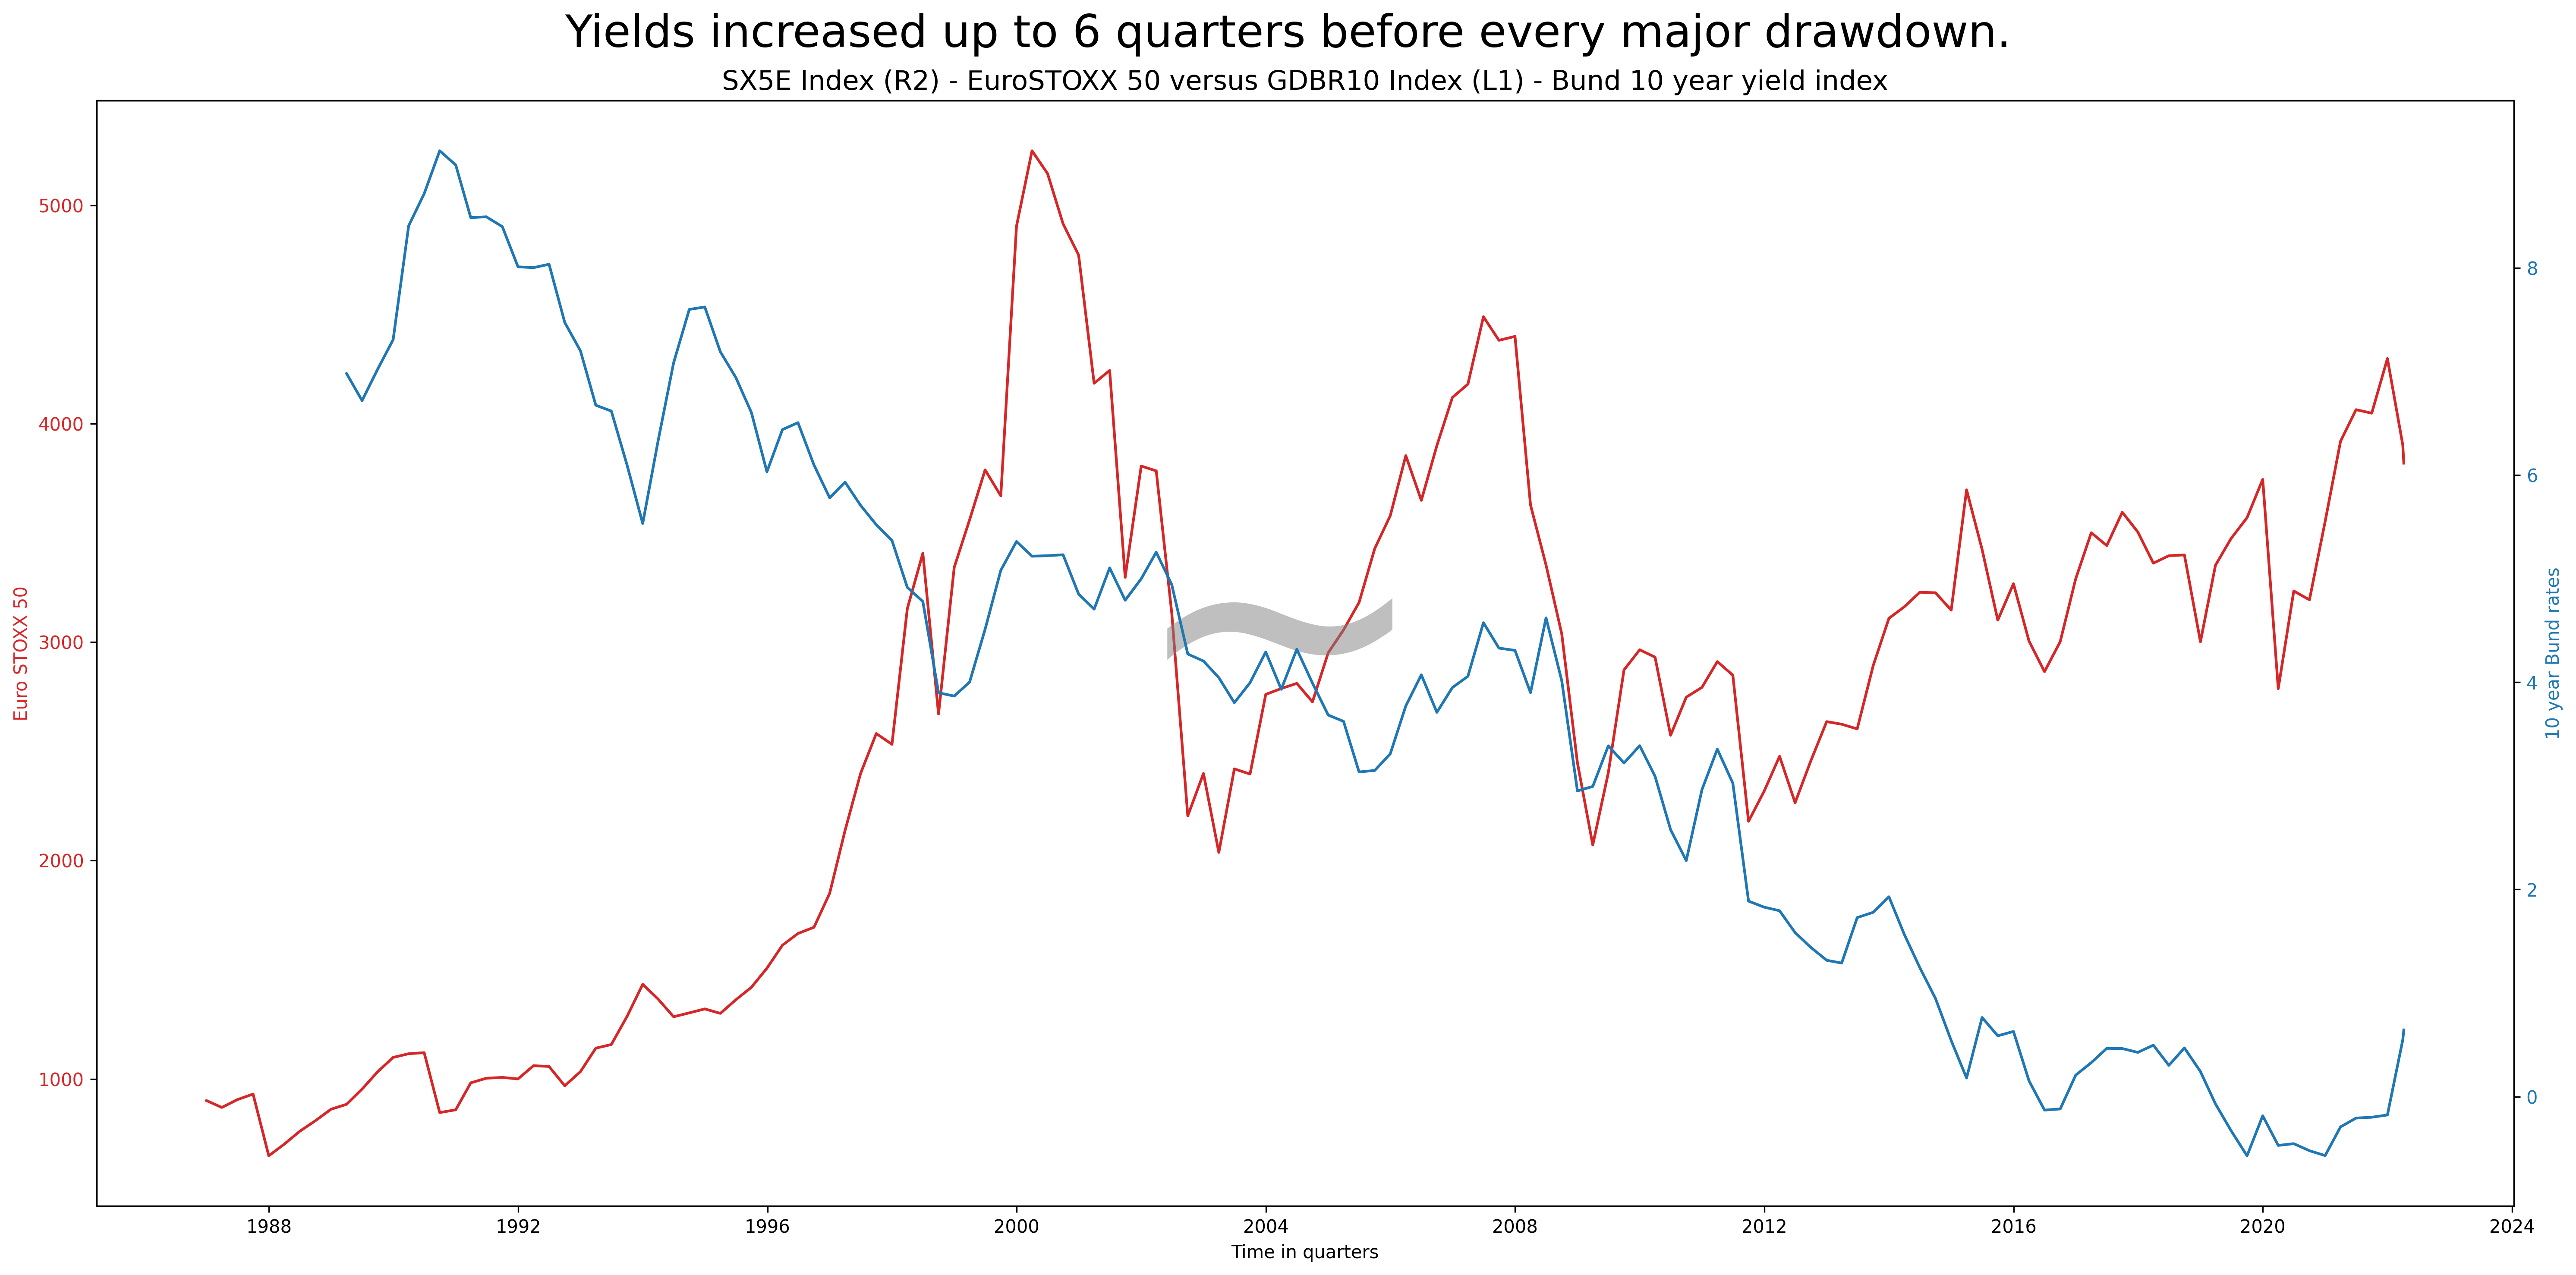

In [7]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_xlabel('Time in quarters')
ax1.set_ylabel('Euro STOXX 50', color=color)
ax1.plot(data.iloc[:,0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('10 year Bund rates', color=color)  # we already handled the x-label with ax1
ax2.plot(data.iloc[:,1], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.text(12500, 3000, '~',
        fontsize=200, color='gray', alpha=0.5,
        ha='center', va='center')

plt.suptitle('Yields increased up to 6 quarters before every major drawdown.', size=25)
plt.title('SX5E Index (R2) - EuroSTOXX 50 versus GDBR10 Index (L1) - Bund 10 year yield index', size = 15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [8]:
# Create percentage change to see how the reaction is
df = data.pct_change()

In [9]:
df['SX5E Index  (R2) Shift'] = df['SX5E Index  (R2)'].shift(6)

In [10]:
df = df[["GDBR10 Index  (L1)", "SX5E Index  (R2)", 'SX5E Index  (R2) Shift']]
df = df.melt('GDBR10 Index  (L1)')

**Return scatter**

/var/folders/70/wlkw8m0d7ls5hgplpk5b0btr0000gn/T/ipykernel_2780/75337152.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  ax.figure.tight_layout()


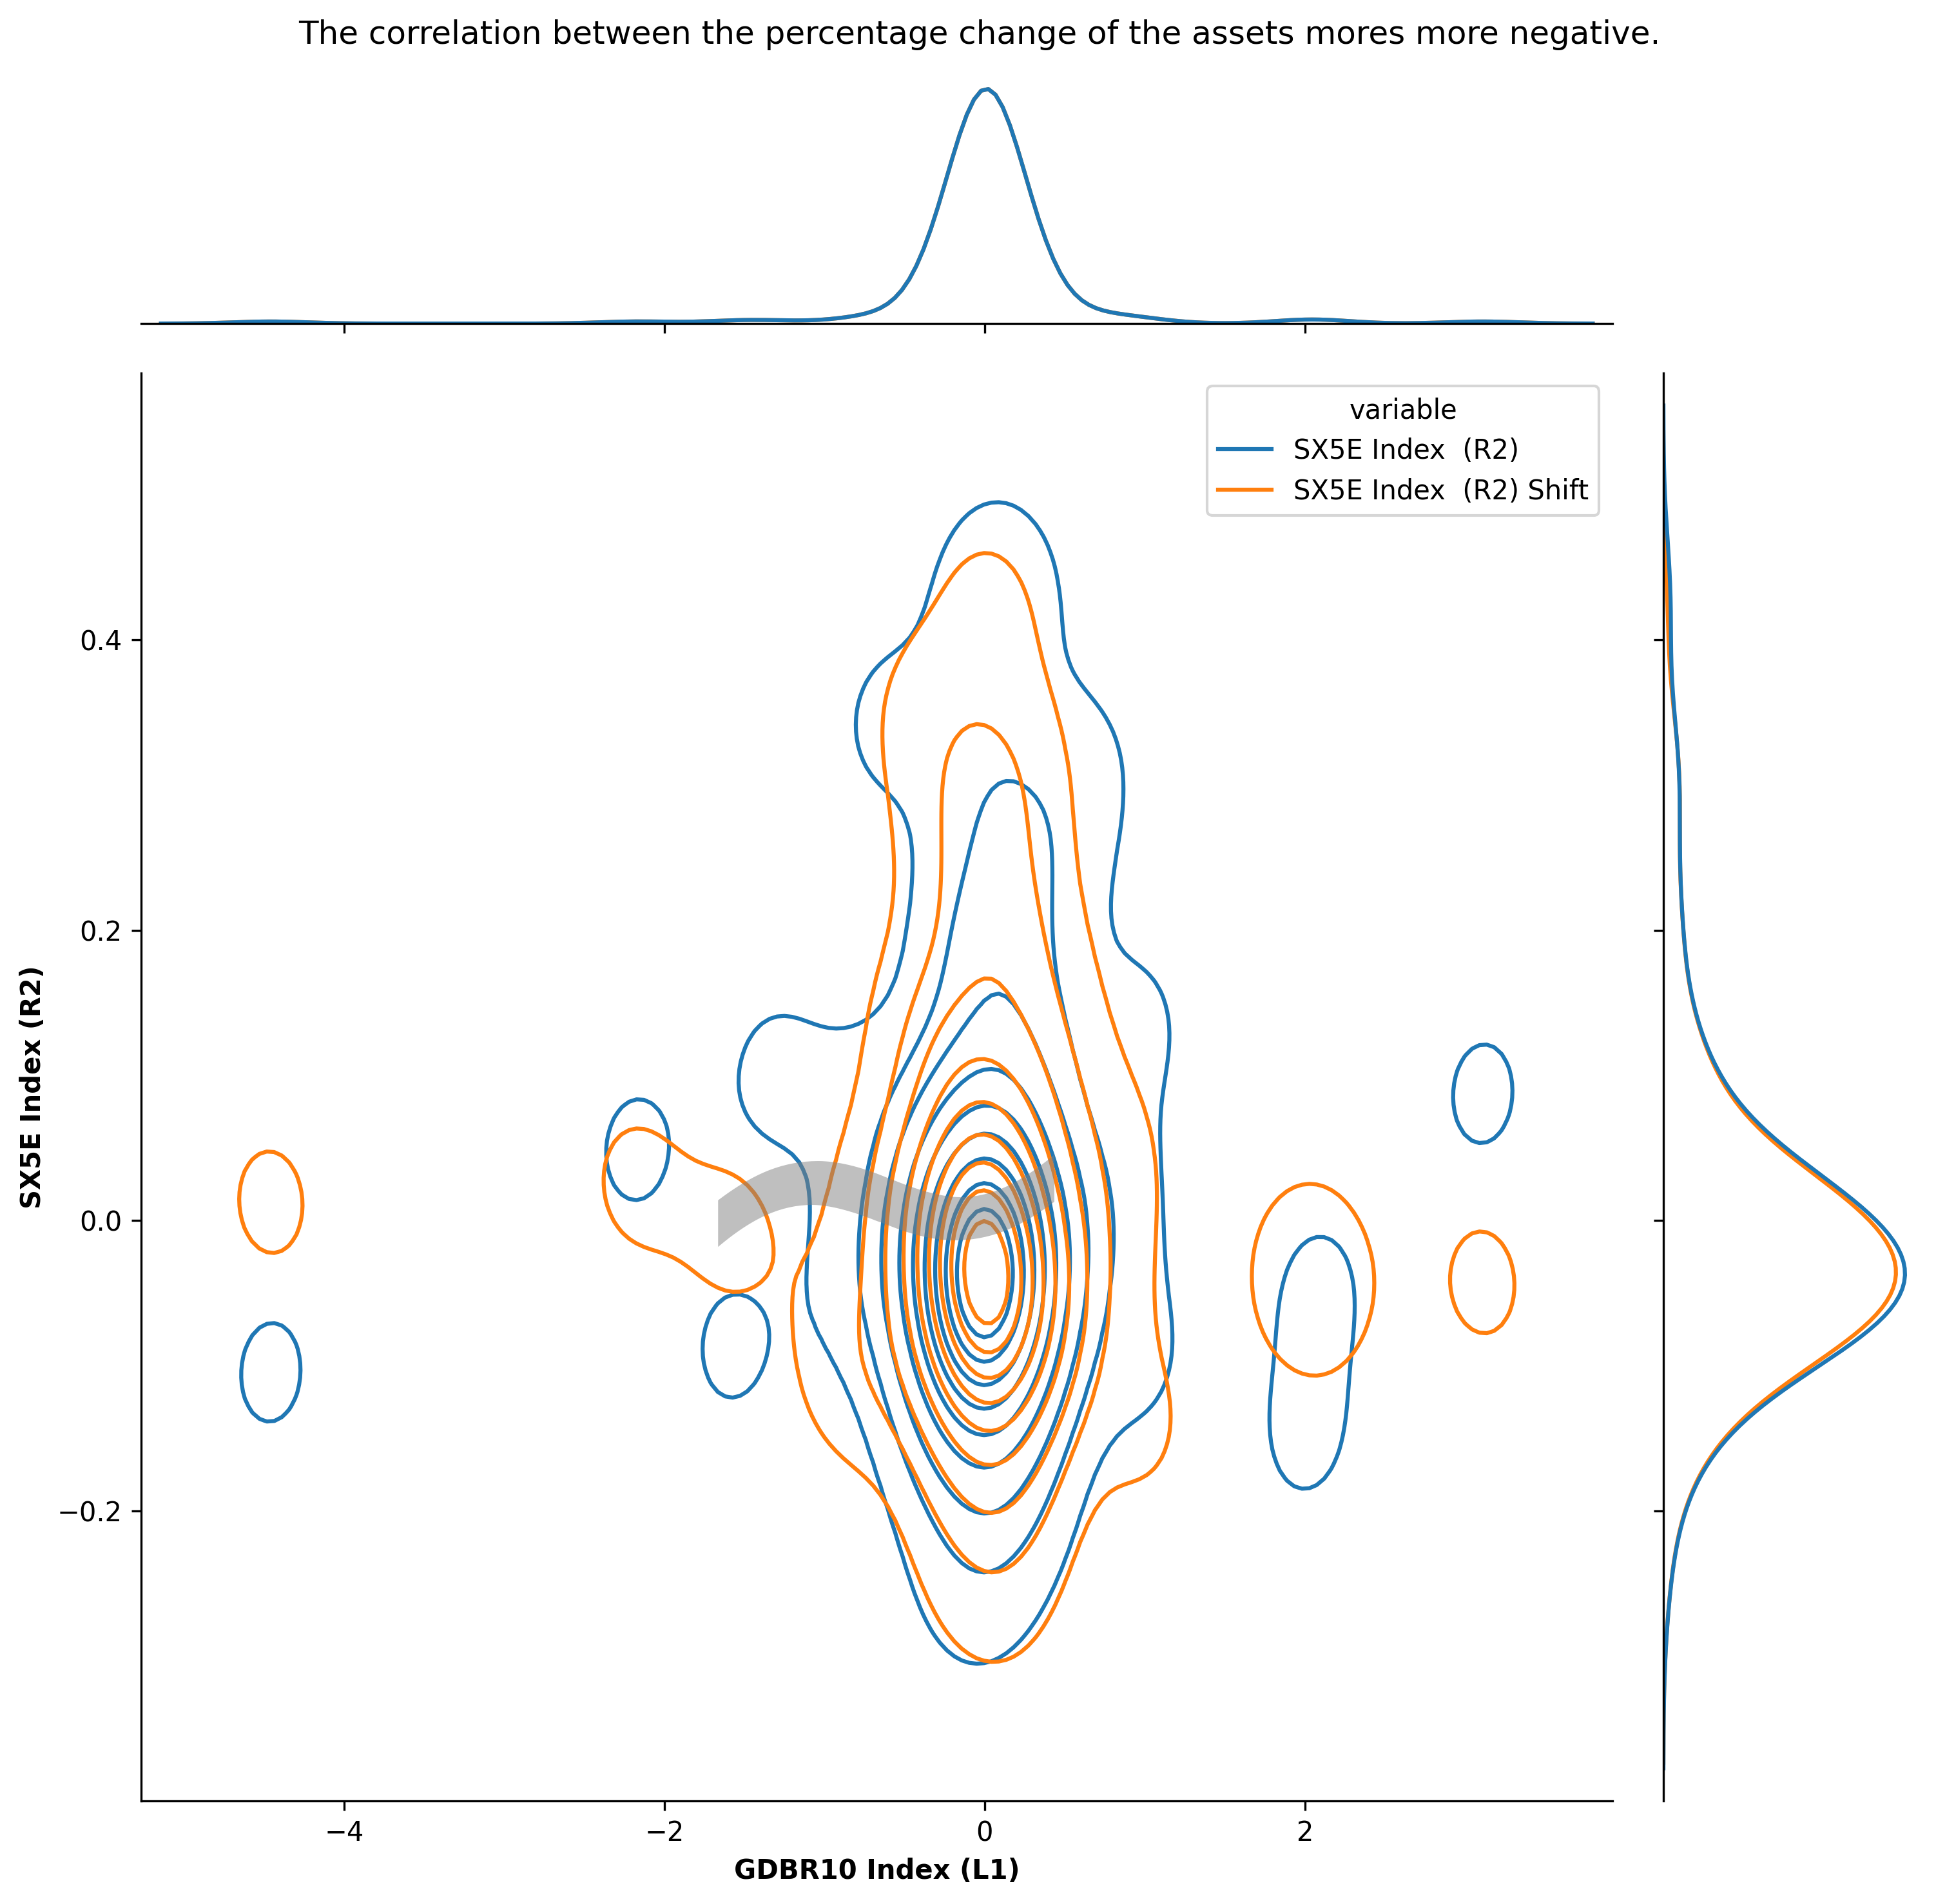

In [11]:
ax = sns.jointplot(data=df, x="GDBR10 Index  (L1)", y="value", hue="variable", kind="kde", height = 10)

ax.ax_joint.set_xlabel('GDBR10 Index (L1)', fontweight='bold')
ax.ax_joint.set_ylabel('SX5E Index (R2)', fontweight='bold')

plt.text(-8, 0, '~',
        fontsize=200, color='gray', alpha=0.5,
        ha='center', va='center')

ax.fig.suptitle('The correlation between the percentage change of the assets mores more negative.')
ax.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

ax.figure.tight_layout()
plt.show()